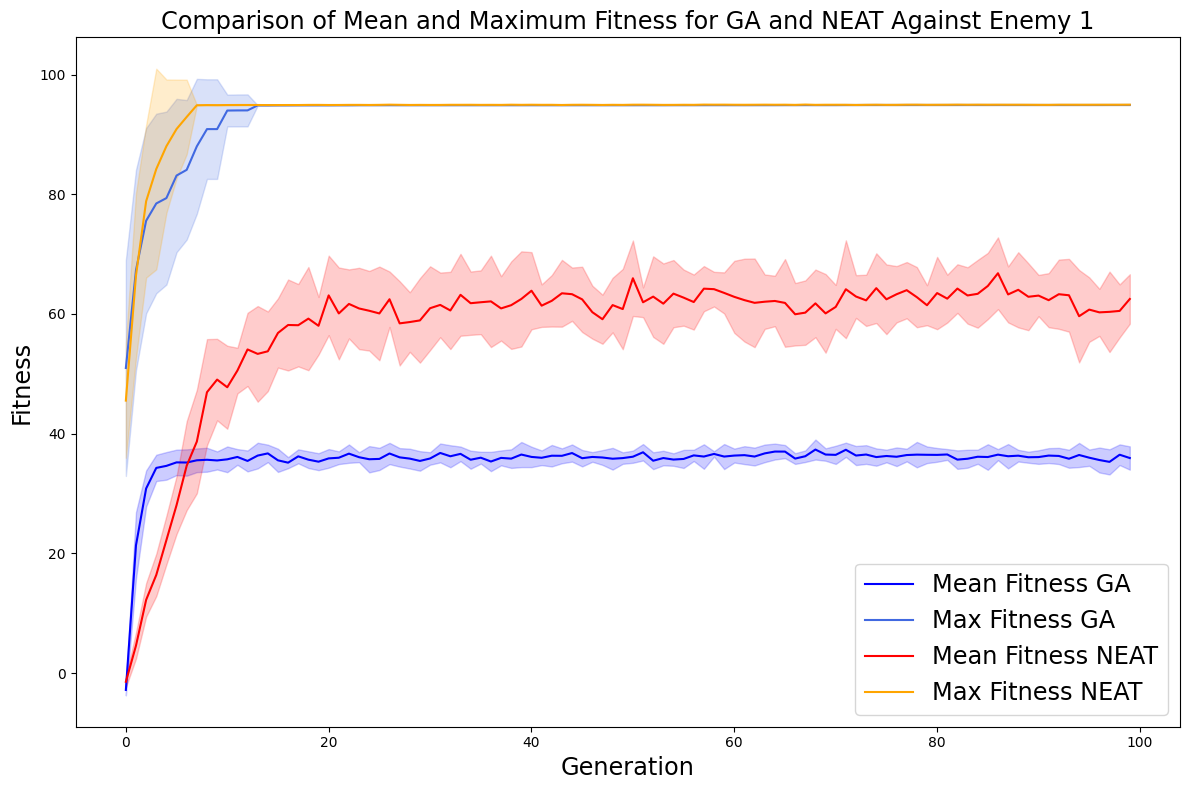

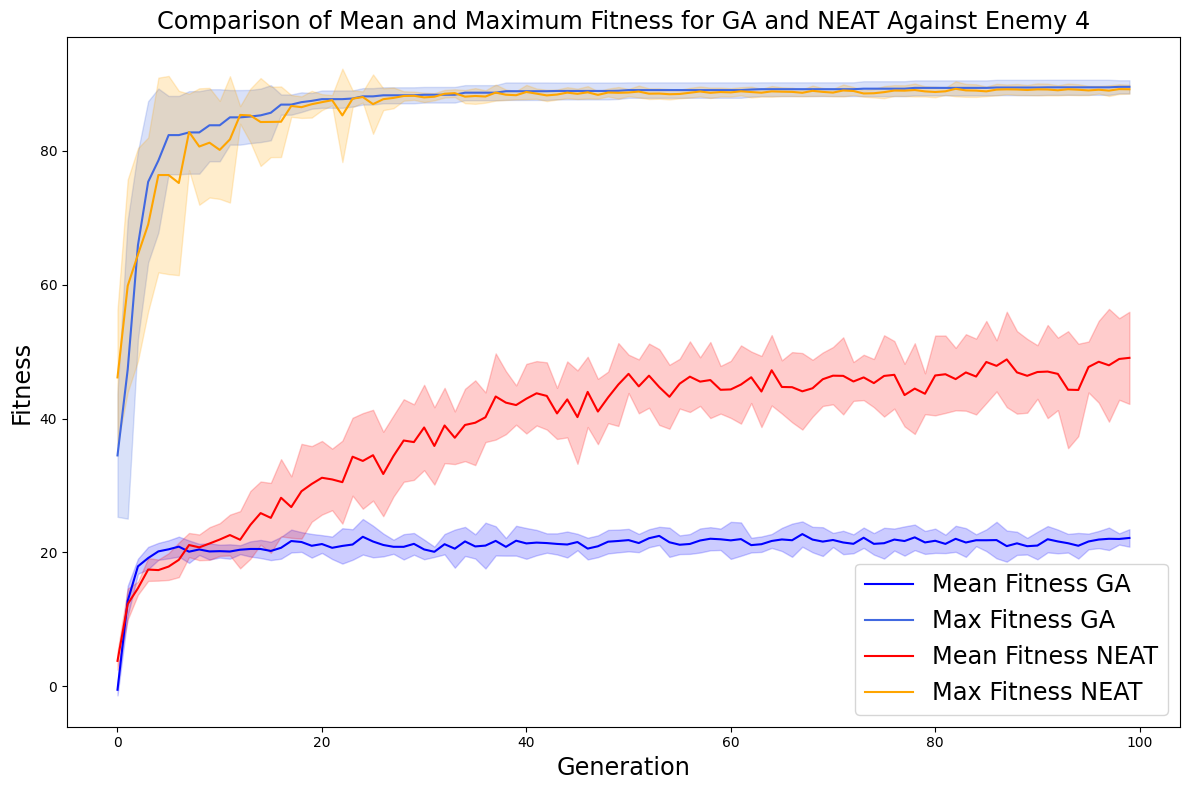

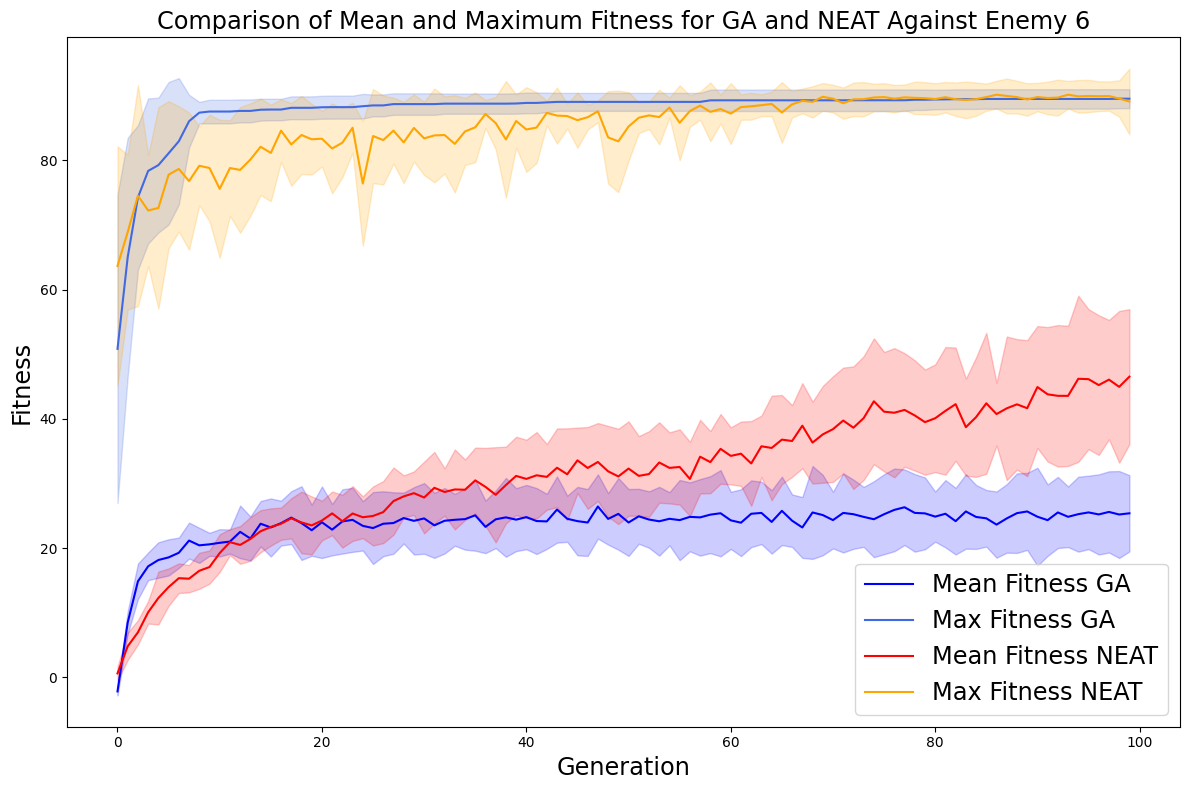

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_data_for_algorithm(algorithm):
    data_by_enemy = {}
    
    for enemy in [1, 4, 6]:
        if algorithm == 'EA':
            filename = f"EA_enemy_{enemy}_mean_results.csv"
        else:  # 'NEAT'
            filename = f"NEAT_enemy_{enemy}_mean_results.csv"
            
        df = pd.read_csv(filename)
        
        data = {
            'mean_fitness': df['mean_of_mean_fitness'].values,
            'std_mean_fitness': df['std_of_mean_fitness'].values,
            'max_fitness': df['mean_of_max_fitness'].values,
            'std_max_fitness': df['std_of_max_fitness'].values,
            'stdev_fitness': df['mean_of_stdev_fitness'].values
        }
        data_by_enemy[enemy] = data
        
    return data_by_enemy

# Get data for both algorithms
ea_data = get_data_for_algorithm('EA')
neat_data = get_data_for_algorithm('NEAT')

for enemy in [1, 4, 6]:
    plt.figure(figsize=(12, 8))
    
    # Plot for EA
    plt.plot(ea_data[enemy]['mean_fitness'], label="Mean Fitness GA", color='blue')
    plt.fill_between(range(len(ea_data[enemy]['mean_fitness'])), 
                    ea_data[enemy]['mean_fitness'] - ea_data[enemy]['std_mean_fitness'], 
                    ea_data[enemy]['mean_fitness'] + ea_data[enemy]['std_mean_fitness'], 
                    color='blue', alpha=0.2)
    
    # Modify the color here to a darker blue
    plt.plot(ea_data[enemy]['max_fitness'], label="Max Fitness GA", color='royalblue')
    plt.fill_between(range(len(ea_data[enemy]['max_fitness'])), 
                    ea_data[enemy]['max_fitness'] - ea_data[enemy]['std_max_fitness'], 
                    ea_data[enemy]['max_fitness'] + ea_data[enemy]['std_max_fitness'], 
                    color='royalblue', alpha=0.2)
    
    # Plot for NEAT
    plt.plot(neat_data[enemy]['mean_fitness'], label="Mean Fitness NEAT", color='red')
    plt.fill_between(range(len(neat_data[enemy]['mean_fitness'])), 
                    neat_data[enemy]['mean_fitness'] - neat_data[enemy]['std_mean_fitness'], 
                    neat_data[enemy]['mean_fitness'] + neat_data[enemy]['std_mean_fitness'], 
                    color='red', alpha=0.2)
    
    plt.plot(neat_data[enemy]['max_fitness'], label="Max Fitness NEAT", color='orange')
    plt.fill_between(range(len(neat_data[enemy]['max_fitness'])), 
                    neat_data[enemy]['max_fitness'] - neat_data[enemy]['std_max_fitness'], 
                    neat_data[enemy]['max_fitness'] + neat_data[enemy]['std_max_fitness'], 
                    color='orange', alpha=0.2)
    
    plt.xlabel('Generation', fontsize='xx-large')
    plt.ylabel('Fitness', fontsize='xx-large')
    plt.title(f'Comparison of Mean and Maximum Fitness for GA and NEAT Against Enemy {enemy}', fontsize='xx-large')
    plt.grid(False)
    plt.legend(loc='lower right', fontsize='xx-large')
    plt.tight_layout()
    plt.savefig(f"Comparison_for_Enemy_{enemy}.png")
    plt.show()
